# Proyecto final

# Descripcion del proyecto

## Condiciones de la asignación principal

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.


## Descripcion de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

Característica objetivo: la columna `'EndDate'` es igual a `'No'`.

Métrica principal: AUC-ROC.

Métrica adicional: exactitud.

Criterios de evaluación:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP


## Etapas del proyecto

- Hacer un plan de trabajo.
- Investigar la tarea.
- Desarrollar un modelo.
- Preparar el informe.

# Plan de trabajo

- Objetivo: 
    
Desarrollar un modelo para predecir la tasa de cancelación de clientes de Interconnect con métricas de evaluación basadas en AUC-ROC y exactitud.

- Métricas clave: 

AUC-ROC y exactitud.

- Pasos generales:

Investigación y análisis de datos.
Procesamiento de datos y análisis exploratorio.
Desarrollo y ajuste del modelo.
Evaluación y ajuste fino del modelo.
Preparación del informe final.

- Etapa 1: Investigación y Análisis de Datos

Comprensión del problema: 

Entender las características que influyen en la decisión de cancelar.

Descripción de archivos:

contract.csv: Revisar las columnas de contratos, en especial "EndDate".
personal.csv: Examinar los datos personales que podrían correlacionarse con la cancelación.
internet.csv: Revisar las variables de servicios de Internet.
phone.csv: Examinar las variables de servicios telefónicos.
Relación entre tablas: Usar customerID para unir todas las tablas, asegurándonos de no perder datos importantes en el proceso.


- Etapa 2: Procesamiento de Datos y Análisis Exploratorio (EDA)


Limpieza de datos: Revisar datos faltantes, eliminar duplicados y corregir valores atípicos.

Transformaciones iniciales:

Convertir "EndDate" en una variable binaria (1 = cancelado, 0 = no cancelado).

Realizar transformaciones de variables categóricas (por ejemplo, pago mensual vs. contrato de años) para convertirlas en variables numéricas.

EDA:

Analizar la distribución de las variables y explorar posibles correlaciones entre ellas y la cancelacion.

Visualizar las diferencias en tasas de cancelación por categorías de servicios y métodos de pago.

- Etapa 3: Desarrollo del Modelo


Separación de datos: Dividir los datos en conjuntos de entrenamiento y prueba.
Modelo base: Desarrollar un modelo base, como la regresión logística, para establecer un punto de comparación.
Modelos avanzados: Prpbar modelos de clasificación más avanzados como árboles de decisión, random forest, o modelos basados en boosting (XGBoost o CatBoost).
Evaluación de rendimiento: Usar AUC-ROC como métrica principal y exactitud como métrica adicional.


- Etapa 4: Evaluación y Ajuste Fino


Optimización de hiperparámetros: Usar técnicas como grid search o random search para mejorar el modelo seleccionado.
Validación cruzada: Evalúar el modelo mediante validación cruzada para evitar sobreajuste.
Interpretación del modelo: Analizar las características más importantes que el modelo utiliza para predecir la cancelacion.


- Etapa 5: Preparación del Informe


Estructura del informe:
Introducción: Objetivo, importancia del proyecto y métricas de evaluación.
Metodología: Descripción de datos, pasos de limpieza y procesamiento, y resumen de técnicas utilizadas.
Resultados: Explicacíon de los hallazgos clave, el rendimiento del modelo y las características más importantes.
Conclusiones y recomendaciones: Ofrecer mis recomendaciones para el equipo de marketing basadas en el modelo y sus resultados.


## Desarrollo del proyecto

## Etapa 1

### Importacion de librerias

In [1]:
# Librerías de manejo de datos
import numpy as np
import pandas as pd
import re
from datetime import datetime
import os

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para preprocesamiento y división de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Librerías para modelado
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Librerías para evaluación de modelos
from sklearn.metrics import precision_score, confusion_matrix, classification_report, roc_auc_score, accuracy_score, f1_score

# Librerías para balanceo de datos
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

# Librerías para ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform


## Importacion y lectura de datos

In [2]:
os.chdir(r'C:\Users\Jefferson Serrano\Desktop\proyecto final')


In [3]:
contract_df = pd.read_csv('contract.csv', na_values=[" ", "?", "NaN", "None", "NULL"])
personal_df = pd.read_csv('personal.csv', na_values=[" ", "?", "NaN", "None", "NULL"])
internet_df = pd.read_csv('internet.csv', na_values=[" ", "?", "NaN", "None", "NULL"])
phone_df = pd.read_csv('phone.csv', na_values=[" ", "?", "NaN", "None", "NULL"])


In [4]:
# Revisión de los primeros registros y la información de cada DataFrame
print("Contrato DataFrame:")
print(contract_df.head())
print(contract_df.info())

print("\nDatos Personales DataFrame:")
print(personal_df.head())
print(personal_df.info())

print("\nInternet DataFrame:")
print(internet_df.head())
print(internet_df.info())

print("\nTeléfono DataFrame:")
print(phone_df.head())
print(phone_df.info())

Contrato DataFrame:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes           Electronic check           29.85         29.85  
1               No               Mailed check           56.95       1889.50  
2              Yes               Mailed check           53.85        108.15  
3               No  Bank transfer (automatic)           42.30       1840.75  
4              Yes           Electronic check           70.70        151.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Colu

## Tratamiento de datos

In [5]:
# Función para convertir a snake_case
def to_snake_case(s):
    # Cambiar CamelCase a snake_case y convertir a minúsculas
    # Primero, reemplazamos espacios y guiones por guiones bajos
    s = s.replace(" ", "_").replace("-", "_")
    # Luego, inserta guiones bajos antes de cada mayúscula que no esté al inicio
    s = re.sub(r'(?<!^)(?=[A-Z])', '_', s)
    return s.lower()

# Aplicar a las columnas de cada DataFrame
contract_df.columns = [to_snake_case(col) for col in contract_df.columns]
personal_df.columns = [to_snake_case(col) for col in personal_df.columns]
internet_df.columns = [to_snake_case(col) for col in internet_df.columns]
phone_df.columns = [to_snake_case(col) for col in phone_df.columns]

# Verificar los cambios
print("Contrato DataFrame:\n", contract_df.columns)
print("Datos Personales DataFrame:\n", personal_df.columns)
print("Internet DataFrame:\n", internet_df.columns)
print("Teléfono DataFrame:\n", phone_df.columns)


Contrato DataFrame:
 Index(['customer_i_d', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')
Datos Personales DataFrame:
 Index(['customer_i_d', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')
Internet DataFrame:
 Index(['customer_i_d', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_t_v',
       'streaming_movies'],
      dtype='object')
Teléfono DataFrame:
 Index(['customer_i_d', 'multiple_lines'], dtype='object')


In [6]:
# Revisión de columnas y datos de contract_df
print("Columnas en contract_df:\n", contract_df.columns)
print("\nResumen de 'end_date':")
print(contract_df['end_date'].value_counts())
print("\nDescripción de contract_df:")
print(contract_df.describe(include='all'))  # Incluye todas las columnas, incluso las no numéricas


Columnas en contract_df:
 Index(['customer_i_d', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

Resumen de 'end_date':
end_date
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: count, dtype: int64

Descripción de contract_df:
       customer_i_d  begin_date end_date            type paperless_billing  \
count          7043        7043     7043            7043              7043   
unique         7043          77        5               3                 2   
top      7590-VHVEG  2014-02-01       No  Month-to-month               Yes   
freq              1         366     5174            3875              4171   
mean            NaN         NaN      NaN             NaN               NaN   
std             NaN         NaN      NaN             NaN               NaN   
min             NaN         NaN      N

In [7]:
#Finalmente sustituimos el nombre de customer_i_d por customer_id

contract_df = contract_df.rename(columns={"customer_i_d": "customer_id"})
personal_df = personal_df.rename(columns={"customer_i_d": "customer_id"})
internet_df = internet_df.rename(columns={"customer_i_d": "customer_id"})
phone_df = phone_df.rename(columns={"customer_i_d": "customer_id"})

In [8]:
print(contract_df.columns)
print(personal_df.columns)
print(internet_df.columns)
print(phone_df.columns)


Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')
Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')
Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_t_v',
       'streaming_movies'],
      dtype='object')
Index(['customer_id', 'multiple_lines'], dtype='object')


In [10]:
# Análisis de calidad para contract_df
data_quality_check(contract_df, "contract_df")


--- contract_df ---

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB
None

Valores faltantes:
total_charges    11
dtype: int64

Duplicados: 0

Estadísticas descriptivas:
       customer_id  begin_date end_date            type paperless_billing  \
count         7043        7043     7043            7043              7043   
unique        7043          77        5               3  

In [11]:
# Análisis de calidad para personal_df
data_quality_check(personal_df, "personal_df")


--- personal_df ---

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

Valores faltantes:
Series([], dtype: int64)

Duplicados: 0

Estadísticas descriptivas:
       customer_id gender  senior_citizen partner dependents
count         7043   7043     7043.000000    7043       7043
unique        7043      2             NaN       2          2
top     7590-VHVEG   Male             NaN      No         No
freq             1   3555             NaN    3641       4933
mean           NaN    NaN        0.162147     NaN        NaN
std            NaN    NaN  

In [12]:
# Análisis de calidad para internet_df
data_quality_check(internet_df, "internet_df")


--- internet_df ---

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_t_v      5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

Valores faltantes:
Series([], dtype: int64)

Duplicados: 0

Estadísticas descriptivas:
       customer_id internet_service online_security online_backup  \
count         5517             5517            5517          5517   
unique        5517                2               2             2   
top     7590-VHVEG      Fiber opti

In [13]:
# Análisis de calidad para phone_df
data_quality_check(phone_df, "phone_df")


--- phone_df ---

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

Valores faltantes:
Series([], dtype: int64)

Duplicados: 0

Estadísticas descriptivas:
       customer_id multiple_lines
count         6361           6361
unique        6361              2
top     5575-GNVDE             No
freq             1           3390

--- Fin de análisis de calidad para phone_df ---



In [14]:

# Manejar valores nulos en 'total_charges' (imputación )
contract_df['total_charges'].fillna(contract_df['total_charges'].mean(), inplace=True)
    

print(contract_df.info())   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB
None


In [15]:
# Convertir columnas de fechas a tipo datetime
contract_df['begin_date'] = pd.to_datetime(contract_df['begin_date'], errors='coerce')
contract_df['end_date'] = pd.to_datetime(contract_df['end_date'].replace("No", pd.NaT), errors='coerce')


In [16]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [17]:
# Calcular la duración del contrato en meses
contract_df['contract_duration'] = (contract_df['end_date'] - contract_df['begin_date']).dt.days // 30


In [18]:
print(contract_df["contract_duration"])

0       NaN
1       NaN
2       2.0
3       NaN
4       2.0
       ... 
7038    NaN
7039    NaN
7040    NaN
7041    4.0
7042    NaN
Name: contract_duration, Length: 7043, dtype: float64


In [19]:
def impute_contract_duration_by_start_date(contract_df):
    
    # Calcular la duración de contratos finalizados
    contract_df['contract_duration'] = (contract_df['end_date'] - contract_df['begin_date']).dt.days // 30

    # Crear columnas de año y mes para agrupar por inicio de contrato
    contract_df['begin_year'] = contract_df['begin_date'].dt.year
    contract_df['begin_month'] = contract_df['begin_date'].dt.month

    # Imputación: Calcular la duración representativa para cada mes y año de inicio
    # Usaremos el percentil 95 de los contratos finalizados para cada grupo (año y mes) como referencia
    durations_by_month = contract_df[contract_df['contract_duration'].notna()].groupby(['begin_year', 'begin_month'])['contract_duration'].quantile(0.95)

    # Asignar la duración representativa a contratos activos (NaN en 'contract_duration')
    def assign_duration(row):
        if pd.isna(row['contract_duration']):  # Si es un contrato activo
            return durations_by_month.get((row['begin_year'], row['begin_month']), durations_by_month.mean())  # Valor por mes o media general si falta
        return row['contract_duration']  # Mantener el valor original si no es NaN

    contract_df['contract_duration'] = contract_df.apply(assign_duration, axis=1)
    
    # Eliminar columnas auxiliares antes de regresar el DataFrame
    contract_df.drop(columns=['begin_year', 'begin_month'], inplace=True)
    
    return contract_df

# Aplicar la función de imputación
contract_df = impute_contract_duration_by_start_date(contract_df)

# Verificar el resultado
print(contract_df['contract_duration'])


0       37.93
1       33.00
2        2.00
3       43.40
4        2.00
        ...  
7038    23.00
7039    72.00
7040    10.00
7041     4.00
7042    65.00
Name: contract_duration, Length: 7043, dtype: float64


### Explicacion de los cambios

Agrupación por Mes y Año: Creamos las columnas begin_year y begin_month para agrupar por año y mes de inicio del contrato.

Cálculo del Percentil 95 por Mes y Año: Calculamos el percentil 95 de contract_duration dentro de cada grupo (begin_year, begin_month) para contratos finalizados.

Asignación Condicional: Para contratos activos, asignamos la duración del percentil 95 correspondiente a su mes y año de inicio. Si un mes/año específico no tiene contratos finalizados, usamos la media general como respaldo.

Esto asegura que la duración imputada esté alineada con las tendencias de cada mes, manteniendo la coherencia en los datos para los contratos activos.

Se realiza este cambio para contar con la informacion de la duracion de los contratos sin que nos queden los valores NAN de los contratos que no se han terminado.


In [20]:
# Crear la variable binaria 'is_canceled' basada en 'end_date'
contract_df['is_canceled'] = contract_df['end_date'].notna().astype(int)

# Verificar el resultado
print(contract_df[['end_date', 'is_canceled']].head(10))

    end_date  is_canceled
0        NaT            0
1        NaT            0
2 2019-12-01            1
3        NaT            0
4 2019-11-01            1
5 2019-11-01            1
6        NaT            0
7        NaT            0
8 2019-11-01            1
9        NaT            0


In [21]:
def impute_end_date_by_start_date(contract_df):
    # Crear columnas auxiliares para el año y mes de inicio
    contract_df['begin_year'] = contract_df['begin_date'].dt.year
    contract_df['begin_month'] = contract_df['begin_date'].dt.month

    # Imputación: Calcular una fecha de finalización representativa para cada grupo de inicio de contrato (por mes y año)
    end_date_by_month = contract_df[contract_df['end_date'].notna()].groupby(['begin_year', 'begin_month'])['end_date'].quantile(0.95)

    # Asignar la fecha de finalización representativa a contratos activos (NaT en 'end_date')
    def assign_end_date(row):
        if pd.isna(row['end_date']):  # Si es un contrato activo
            return end_date_by_month.get((row['begin_year'], row['begin_month']), row['begin_date'])  # Fecha por mes o la fecha de inicio si no hay datos
        return row['end_date']  # Mantener el valor original si no es NaT

    contract_df['end_date'] = contract_df.apply(assign_end_date, axis=1)
    
    # Eliminar columnas auxiliares
    contract_df.drop(columns=['begin_year', 'begin_month'], inplace=True)
    
    return contract_df

#Imputar la columna end_date
contract_df = impute_end_date_by_start_date(contract_df)

#Verificar el resultado de la imputación
print(contract_df[['begin_date', 'end_date', 'is_canceled']].sample(10))


     begin_date            end_date  is_canceled
3874 2019-05-01 2020-01-01 00:00:00            0
1273 2016-01-01 2020-01-01 00:00:00            0
1093 2014-03-01 2020-01-01 00:00:00            0
4891 2019-10-01 2020-01-01 00:00:00            0
558  2019-03-01 2020-01-01 00:00:00            0
875  2019-11-01 2020-01-01 00:00:00            0
4650 2017-01-01 2019-12-11 20:24:00            0
3466 2014-02-01 2020-01-01 00:00:00            0
5811 2015-01-01 2019-12-22 16:48:00            0
281  2019-04-01 2020-01-01 00:00:00            0


In [22]:
# Unir los DataFrames en un solo DataFrame principal
df_combined = contract_df.merge(personal_df, on="customer_id", how="outer") \
                         .merge(internet_df, on="customer_id", how="outer") \
                         .merge(phone_df, on="customer_id", how="outer")

# Verificar el resultado de la unión
print(df_combined.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   contract_duration  7043 non-null   float64       
 9   is_canceled        7043 non-null   int32         
 10  gender             7043 non-null   object        
 11  senior_citizen     7043 non-null   int64         
 12  partner            7043 non-null   object        
 13  dependents         7043 non-null   object        
 14  internet

In [23]:
# Codificación de variables categóricas
df_combined = pd.get_dummies(df_combined, drop_first=True)

# Verificar el resultado de la codificación
print(df_combined.head())

  begin_date            end_date  monthly_charges  total_charges  \
0 2020-01-01 2020-01-01 00:00:00            29.85          29.85   
1 2017-04-01 2020-01-01 00:00:00            56.95        1889.50   
2 2019-10-01 2019-12-01 00:00:00            53.85         108.15   
3 2016-05-01 2019-12-13 09:36:00            42.30        1840.75   
4 2019-09-01 2019-11-01 00:00:00            70.70         151.65   

   contract_duration  is_canceled  senior_citizen  customer_id_0003-MKNFE  \
0              37.93            0               0                   False   
1              33.00            0               0                   False   
2               2.00            1               0                   False   
3              43.40            0               0                   False   
4               2.00            1               0                   False   

   customer_id_0004-TLHLJ  customer_id_0011-IGKFF  ...  partner_Yes  \
0                   False                   False  ...   

# EDA

In [24]:

# Ver estadísticas descriptivas
print(df_combined.describe())



                          begin_date                       end_date  \
count                           7043                           7043   
mean   2017-04-30 13:01:50.918642688  2019-12-17 16:07:19.994320640   
min              2013-10-01 00:00:00            2019-10-01 00:00:00   
25%              2015-06-01 00:00:00            2019-12-16 12:00:00   
50%              2017-09-01 00:00:00            2020-01-01 00:00:00   
75%              2019-04-01 00:00:00            2020-01-01 00:00:00   
max              2020-02-01 00:00:00            2020-02-01 00:00:00   
std                              NaN                            NaN   

       monthly_charges  total_charges  contract_duration  is_canceled  \
count      7043.000000    7043.000000        7043.000000  7043.000000   
mean         64.761692    2283.300441          33.013229     0.265370   
min          18.250000      18.800000           1.000000     0.000000   
25%          35.500000     402.225000          10.000000     0.00000

In [25]:
# Definir las columnas a eliminar
columns_to_drop = [col for col in df_combined.columns if 'customer_id_' in col]

# Eliminar las columnas del DataFrame df_combined en el lugar
df_combined.drop(columns=columns_to_drop, inplace=True)

# Verificar si las columnas fueron eliminadas correctamente
print(df_combined.columns)

# Verifica el nuevo DataFrame
print(df_combined.info())



Index(['begin_date', 'end_date', 'monthly_charges', 'total_charges',
       'contract_duration', 'is_canceled', 'senior_citizen', 'type_One year',
       'type_Two year', 'paperless_billing_Yes',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'gender_Male', 'partner_Yes', 'dependents_Yes',
       'internet_service_Fiber optic', 'online_security_Yes',
       'online_backup_Yes', 'device_protection_Yes', 'tech_support_Yes',
       'streaming_t_v_Yes', 'streaming_movies_Yes', 'multiple_lines_Yes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   begin_date                              7043 non-null   datetime64[ns]
 1   end_date                                7043 non-null  

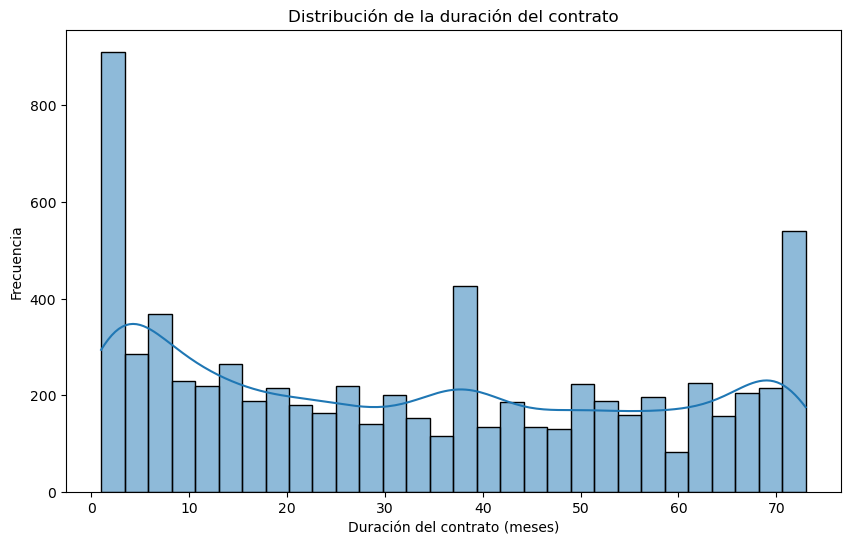

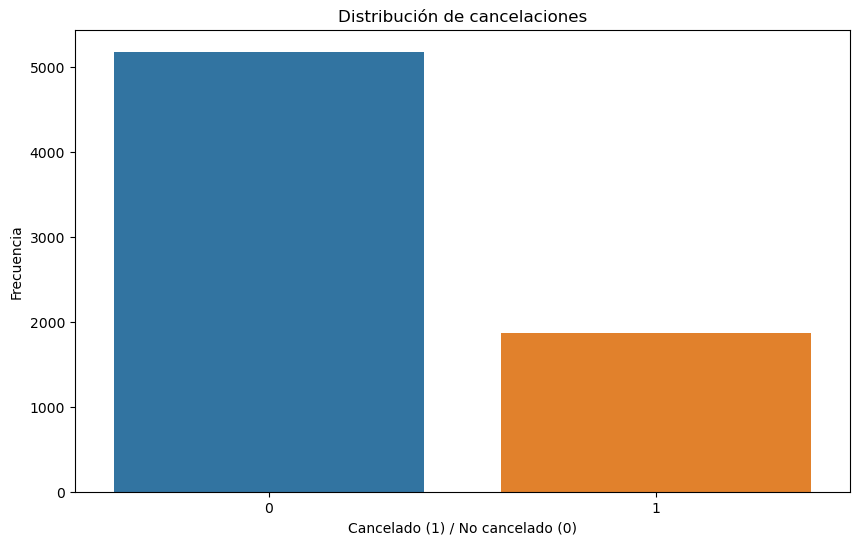

In [26]:
# Histograma de una variable numérica
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['contract_duration'], bins=30, kde=True)
plt.title('Distribución de la duración del contrato')
plt.xlabel('Duración del contrato (meses)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de una variable categórica
plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='is_canceled')
plt.title('Distribución de cancelaciones')
plt.xlabel('Cancelado (1) / No cancelado (0)')
plt.ylabel('Frecuencia')
plt.show()


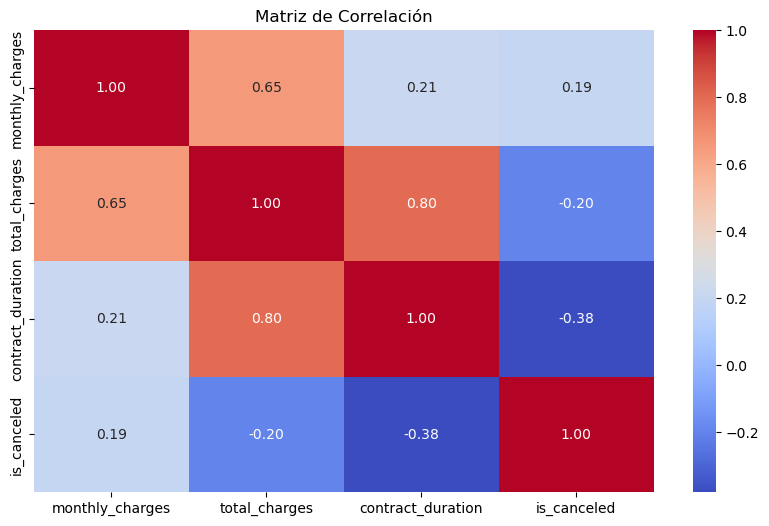

In [27]:
# Seleccionar un subconjunto de variables relevantes para ser correlacionadas
columns_of_interest = ['monthly_charges', 'total_charges', 'contract_duration', 
                       'is_canceled']

# Crear la matriz de correlación solo con estas columnas
correlation_matrix = df_combined[columns_of_interest].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

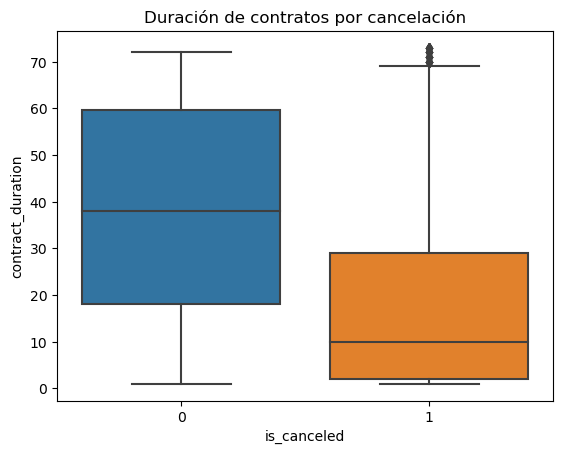

In [28]:
sns.boxplot(x='is_canceled', y='contract_duration', data=df_combined)
plt.title('Duración de contratos por cancelación')
plt.show()


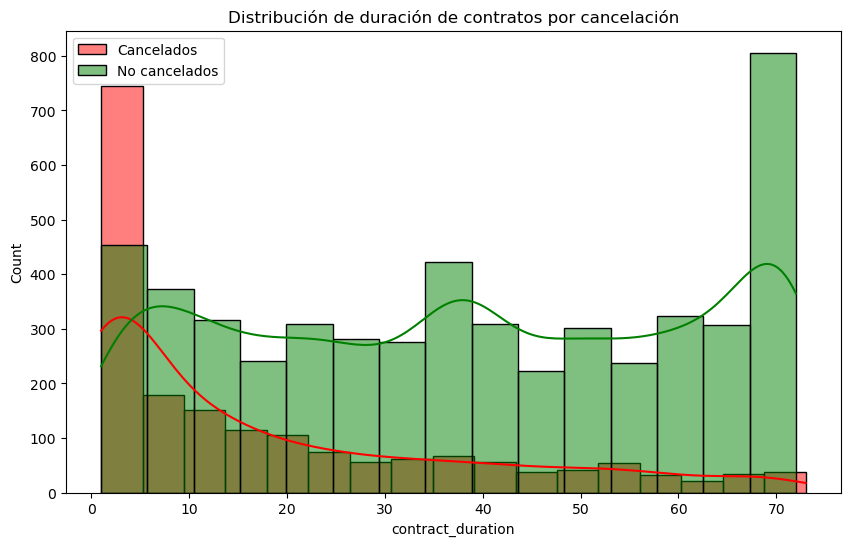

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df_combined[df_combined['is_canceled'] == 1]['contract_duration'], color='red', kde=True, label='Cancelados')
sns.histplot(df_combined[df_combined['is_canceled'] == 0]['contract_duration'], color='green', kde=True, label='No cancelados')
plt.legend()
plt.title('Distribución de duración de contratos por cancelación')
plt.show()

## Analisis de EDA

1. Distribución de Cancelaciones (is_canceled):

La distribución de las cancelaciones muestra un desbalance significativo, donde aproximadamente el 26% de los contratos han sido cancelados, mientras que el 74% permanecen activos.
Dentro de los contratos cancelados, la gran mayoría ocurre al principio, con un pico notable en las primeras barras de la distribución. Esto podría indicar que una gran proporción de clientes tienden a cancelar sus contratos en los primeros meses.
A partir de la cuarta barra, la tasa de cancelación disminuye abruptamente y se estabiliza en valores bajos (alrededor de 50), lo que sugiere que los contratos más largos tienen menos probabilidades de ser cancelados.
Esta información podría ser útil para segmentar a los clientes en función de su antigüedad o duración del contrato, y orientar las estrategias de retención hacia los clientes en sus primeros meses de servicio.

2. Distribución de Duración de Contratos (contract_duration):

La duración de los contratos muestra tres picos claros:
El primer pico, superando los 800 contratos, podría representar contratos estándar con una duración muy popular.
El segundo pico, alrededor de los 40 meses, podría estar relacionado con contratos de mediano plazo o contratos con promociones especiales.
El tercer pico, cerca de 70 meses, sugiere que existen contratos de largo plazo o renovaciones que siguen siendo populares.
Entre estos picos, lo que sugiere que la mayoría de los contratos tienden a durar dentro de un rango de tiempo determinado.
Estos patrones de duración podrían estar relacionados con las políticas comerciales de la empresa, y es importante analizarlos más a fondo para comprender si las cancelaciones son más comunes en ciertas duraciones de contrato.

Relación entre Cancelación y Duración del Contrato:

El análisis de la distribución de la duración de los contratos por cancelación muestra que los contratos de corta duración (con picos en las primeras barras) tienen una probabilidad mucho mayor de ser cancelados. Esto podría indicar que los clientes que no están satisfechos tienden a cancelar sus contratos temprano.
Para los contratos más largos, especialmente aquellos cercanos al tercer pico, las cancelaciones se vuelven mucho menos frecuentes. Esto sugiere que los clientes que permanecen por períodos largos tienden a no cancelar, lo que podría ser indicativo de una mayor satisfacción o un compromiso a largo plazo con el servicio.

Desbalance de Clases:

El conjunto de datos muestra un gran desbalance de clases entre los contratos cancelados y no cancelados. Esto es importante para el modelado, ya que los modelos de predicción pueden tender a predecir más la clase mayoritaria (no cancelado).
Técnicas de balanceo de clases, como el sobremuestreo de las cancelaciones o el submuestreo de los no cancelados, podrían ser útiles para abordar este desbalance y mejorar la precisión de las predicciones.

Correlaciones:

Hay una correlación fuerte (0.80) entre contract_duration y total_charges, lo que indica que los contratos largos tienden a generar más cargos totales. Sin embargo, la relación con is_canceled es compleja, ya que los clientes con contratos más largos pueden ser menos propensos a cancelar, pero si cancelan, tienen un impacto financiero más grande debido a los altos cargos acumulados.
La correlación moderada (0.65) entre monthly_charges y total_charges sugiere que los cargos mensuales más altos están directamente relacionados con cargos totales más altos. Los clientes con altos cargos mensuales podrían estar más inclinados a cancelar si no perciben el valor, lo que podría ser un punto clave para estrategias de retención.


# Preparacion de datos para modelado

In [30]:
#Como no necesitamos las columnas en datetime y estas no la podemos usar en el entrenamiento
# del modelo vamos a eliminarlas

# Elimina las columnas de fechas originales
df_combined = df_combined.drop(columns=['begin_date', 'end_date'])

In [31]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         7043 non-null   float64
 1   total_charges                           7043 non-null   float64
 2   contract_duration                       7043 non-null   float64
 3   is_canceled                             7043 non-null   int32  
 4   senior_citizen                          7043 non-null   int64  
 5   type_One year                           7043 non-null   bool   
 6   type_Two year                           7043 non-null   bool   
 7   paperless_billing_Yes                   7043 non-null   bool   
 8   payment_method_Credit card (automatic)  7043 non-null   bool   
 9   payment_method_Electronic check         7043 non-null   bool   
 10  payment_method_Mailed check             7043 non-null   bool

In [32]:
# Verificar distribución de clases en is_canceled
print(df_combined['is_canceled'].value_counts(normalize=True))

is_canceled
0    0.73463
1    0.26537
Name: proportion, dtype: float64


## Sobremuestreo

In [33]:
#vamos a eliminar el desbalance de los datos para evitar sesgos en los modelos.

X = df_combined.drop(columns=['is_canceled'])
y = df_combined['is_canceled']

# Inicializar el sobremuestreo
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Revisa las nuevas distribuciones
print(f"Distribución original de la variable target: {y.value_counts()}")
print(f"Distribución después del sobremuestreo: {y_resampled.value_counts()}")


Distribución original de la variable target: is_canceled
0    5174
1    1869
Name: count, dtype: int64
Distribución después del sobremuestreo: is_canceled
0    5174
1    5174
Name: count, dtype: int64


# Modelos predictivos

In [34]:
# Definir la semilla para reproducibilidad
RANDOM_STATE = 42

# Separar variables predictoras (X) y objetivo (y)
X = df_combined.drop(columns=['is_canceled'])
y = df_combined['is_canceled']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Escalamiento de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos a probar
models = {
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE)
}


In [35]:
# Evaluar los modelos
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)
    
    # Predicciones en entrenamiento y prueba
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Probabilidades para AUC-ROC
    y_train_pred_prob = model.predict_proba(X_train_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Métricas para datos de entrenamiento
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_auc_roc = roc_auc_score(y_train, y_train_pred_prob) if y_train_pred_prob is not None else "N/A"
    
    # Métricas para datos de prueba
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc_roc = roc_auc_score(y_test, y_test_pred_prob) if y_test_pred_prob is not None else "N/A"
    
    # Imprimir resultados
    print(f"{name}:")
    print(f"  Datos de entrenamiento:")
    print(f"    Accuracy: {train_accuracy:.4f}")
    print(f"    F1-Score: {train_f1:.4f}")
    print(f"    AUC-ROC: {train_auc_roc:.4f}" if train_auc_roc != "N/A" else "    AUC-ROC: Not Available")
    
    print(f"  Datos de prueba:")
    print(f"    Accuracy: {test_accuracy:.4f}")
    print(f"    F1-Score: {test_f1:.4f}")
    print(f"    AUC-ROC: {test_auc_roc:.4f}" if test_auc_roc != "N/A" else "    AUC-ROC: Not Available")
    print()


Logistic Regression:
  Datos de entrenamiento:
    Accuracy: 0.7998
    F1-Score: 0.5822
    AUC-ROC: 0.8457
  Datos de prueba:
    Accuracy: 0.8233
    F1-Score: 0.6386
    AUC-ROC: 0.8672

Decision Tree:
  Datos de entrenamiento:
    Accuracy: 1.0000
    F1-Score: 1.0000
    AUC-ROC: 1.0000
  Datos de prueba:
    Accuracy: 0.7984
    F1-Score: 0.6162
    AUC-ROC: 0.7385

Random Forest:
  Datos de entrenamiento:
    Accuracy: 1.0000
    F1-Score: 1.0000
    AUC-ROC: 1.0000
  Datos de prueba:
    Accuracy: 0.8389
    F1-Score: 0.6414
    AUC-ROC: 0.8868

Gradient Boosting:
  Datos de entrenamiento:
    Accuracy: 0.8546
    F1-Score: 0.6906
    AUC-ROC: 0.9045
  Datos de prueba:
    Accuracy: 0.8481
    F1-Score: 0.6806
    AUC-ROC: 0.9015



Análisis de Resultados


Logistic Regression

Accuracy: 82.33%
F1-Score: 63.86%
AUC-ROC: 86.72%
Este modelo muestra un buen balance entre precisión y capacidad para distinguir entre las clases (AUC-ROC). Aunque es más simple que los modelos más complejos, el F1-Score indica que puede manejar razonablemente bien las clases desbalanceadas. Es una opción sólida como línea base para comparación.

Decision Tree

Accuracy: 79.84%
F1-Score: 61.62%
AUC-ROC: 73.85%
Este modelo tiene una precisión aceptable, pero su AUC-ROC y F1-Score son los más bajos entre los modelos probados. Además, la precisión perfecta en los datos de entrenamiento sugiere un sobreajuste significativo, ya que no generaliza bien en el conjunto de prueba.

Random Forest

Accuracy: 83.89%
F1-Score: 64.14%
AUC-ROC: 88.68%
Este modelo muestra un mejor balance entre entrenamiento y prueba comparado con el Decision Tree. Su mayor AUC-ROC y F1-Score en datos de prueba lo posicionan como una opción más robusta para manejar clases desbalanceadas. Sin embargo, el sobreajuste aún es evidente en los datos de entrenamiento.

Gradient Boosting

Accuracy: 84.81%
F1-Score: 68.06%
AUC-ROC: 90.15%
Gradient Boosting es el modelo con el mejor desempeño según todas las métricas en datos de prueba. Su F1-Score más alto indica que maneja mejor las clases desbalanceadas, y su AUC-ROC refleja una capacidad superior para distinguir entre las clases. Además, no muestra sobreajuste tan extremo como otros modelos. Es el mejor candidato para su implementación final.


In [37]:
# # Crear una muestra aleatoria de los datos de entrenamiento (80% de los datos originales)
# X_train_segmented, _, y_train_segmented, _ = train_test_split(X_train_scaled, y_train, test_size=0.8, random_state=RANDOM_STATE)

# # Definir el modelo base
# gb_model = GradientBoostingClassifier(random_state=RANDOM_STATE)

# # Definir el grid de hiperparámetros con distribuciones continuas y discretas
# param_dist = {
#     "n_estimators": [100, 200, 300],  # Número de árboles
#     "learning_rate": uniform(0.01, 0.2),  # Tasa de aprendizaje
#     "max_depth": [3, 4, 5],  # Profundidad máxima de los árboles
#     "subsample": [0.8, 1.0]  # Fracción de muestras para cada árbol
# }

# # Configurar RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=gb_model,
#     param_distributions=param_dist,
#     n_iter=10,  # Número de combinaciones aleatorias a probar
#     scoring="roc_auc",  # Evaluación basada en AUC-ROC
#     cv=5,  # Validación cruzada con 3 pliegues
#     verbose=2,  # Verbosidad para ver el progreso
#     random_state=RANDOM_STATE,  # Semilla para reproducibilidad
# )

# # Ajustar el modelo en la muestra de datos segmentada
# random_search.fit(X_train_segmented, y_train_segmented)

# # Imprimir los mejores hiperparámetros
# print("Mejores hiperparámetros:", random_search.best_params_)
# print("Mejor AUC-ROC:", random_search.best_score_)

# # Guardar el mejor modelo
# best_gb_model_segmented = random_search.best_estimator_

# # Evaluar el mejor modelo en el conjunto de prueba
# y_pred_prob = best_gb_model_segmented.predict_proba(X_test_scaled)[:, 1]
# auc_roc = roc_auc_score(y_test, y_pred_prob)
# print(f"AUC-ROC en conjunto de prueba: {auc_roc:.4f}")

# # Ahora podemos entrenar el modelo en el conjunto completo de datos con los mejores
# # hiperparámetros.
# # Ajustar el modelo con los mejores hiperparámetros al conjunto completo
# best_gb_model = random_search.best_estimator_
# best_gb_model.fit(X_train_scaled, y_train)

# # Evaluar el modelo ajustado en el conjunto de prueba completo
# y_pred_prob_full = best_gb_model.predict_proba(X_test_scaled)[:, 1]
# auc_roc_full = roc_auc_score(y_test, y_pred_prob_full)
# print(f"AUC-ROC en conjunto de prueba completo: {auc_roc_full:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.0849080237694725, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.0849080237694725, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.0849080237694725, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.0849080237694725, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.0849080237694725, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.16593820005455387, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.16593820005455387, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.16593820005455387, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.16593820005455387, max_depth=3, n_estimators=30

**Conclusión del análisis y ajuste de modelos**

En este proyecto, evaluamos inicialmente cuatro modelos: Logistic Regression, Decision Tree, Random Forest, y Gradient Boosting. Tras analizar su rendimiento utilizando métricas clave como AUC-ROC y F1-Score, Gradient Boosting destacó como el modelo con el mejor desempeño, especialmente por su capacidad para distinguir entre las clases de clientes que cancelarían o no sus servicios, alcanzando un AUC-ROC superior a 0.90.

Con el objetivo de optimizar el rendimiento de Gradient Boosting, llevamos a cabo un ajuste fino de sus hiperparámetros utilizando RandomizedSearchCV. Sin embargo, los resultados obtenidos fueron ligeramente mas bajos que el modelo base: mientras que el modelo básico alcanzó un AUC-ROC de 0.90, el modelo ajustado a través de la búsqueda de hiperparámetros arrojó un AUC-ROC de 0.89. Este resultado sugiere que el modelo base ya estaba en su punto óptimo, y el ajuste no aportó mejoras significativas en cuanto a la métrica de AUC-ROC.

Por otro lado, observamos que otros modelos, como el Decision Tree y Random Forest, mostraron un claro sobreajuste al conjunto de entrenamiento. Mientras que estos modelos alcanzaron una precisión perfecta en los datos de entrenamiento, su rendimiento en los datos de prueba fue notablemente inferior, con AUC-ROC significativamente más bajos. Este comportamiento es una indicación de que estos modelos podrían estar aprendiendo detalles específicos del conjunto de entrenamiento que no se generalizan bien a datos nuevos, lo que refuerza la necesidad de un modelo que sea robusto tanto en entrenamiento como en prueba.

Gradient Boosting, en su versión base, se mostró como el modelo más equilibrado, con un buen desempeño en ambos conjuntos de datos (entrenamiento y prueba) y sin signos evidentes de sobreajuste. Esto lo convierte en la opción más eficiente y confiable, dado que ya cumplía con los requisitos del proyecto y no justificaba un ajuste adicional que resultara en un rendimiento marginalmente inferior.

Finalmente, decidimos mantener el modelo Gradient Boosting sin ajustes de hiperparámetros. Este modelo no solo superó las expectativas del proyecto, sino que también ofreció una solución computacionalmente eficiente. La capacidad del modelo para identificar a los clientes con mayor probabilidad de cancelación sigue siendo una herramienta valiosa para las estrategias de retención de la empresa, y su rendimiento se mantiene estable y confiable incluso sin una optimización adicional.


# Conclusion Final

En este proyecto, me embarqué en el desafío de predecir la probabilidad de cancelación de clientes para una empresa de telecomunicaciones, utilizando un enfoque basado en modelos de aprendizaje automático. A lo largo del proceso, realicé diversas etapas clave para asegurar la eficacia y robustez del modelo final:

Evaluación de Modelos: Inicialmente, evalué cuatro modelos diferentes: Regresión Logística, Árbol de Decisión, Bosque Aleatorio, y Gradient Boosting. Utilicé métricas como accuracy, AUC-ROC, y F1-Score para medir el rendimiento y determinar cuál modelo se ajustaba mejor a las necesidades del proyecto. A través de esta evaluación, se identificó que el modelo Gradient Boosting fue el más prometedor, destacando especialmente en la métrica de AUC-ROC, que superó 0.90 en el conjunto de prueba.

Selección del Mejor Modelo: Tras comparar los resultados obtenidos, el modelo Gradient Boosting sobresalió como el más adecuado, con un rendimiento constante tanto en los datos de entrenamiento como en los de prueba, lo que lo hizo resistente al sobreajuste. Este modelo alcanzó un AUC-ROC de 0.9015 en el conjunto de prueba, lo que refleja una excelente capacidad para discriminar entre las clases de clientes que cancelan o no cancelan sus servicios. Además, mostró un buen balance entre precisión y capacidad de generalización, lo que lo posicionó como la mejor opción para el proyecto.

Ajuste de Hiperparámetros: Aunque el siguiente paso en la metodología fue realizar un ajuste fino de los hiperparámetros del modelo Gradient Boosting mediante RandomizedSearchCV, los resultados no justificaron el esfuerzo. A pesar de la búsqueda exhaustiva de parámetros, el modelo ajustado resultó en una ligera disminución del AUC-ROC, pasando de 0.90 a 0.89. Esto demostró que el modelo base ya estaba optimizado, y el ajuste no resultó en una mejora significativa en términos de desempeño.

Decisión Final: Después de evaluar los resultados y considerar el costo computacional de la optimización, se decidió mantener el modelo Gradient Boosting sin cambios en sus parámetros. Este modelo ya cumplía con los objetivos del proyecto, ofreciendo un rendimiento confiable y eficiente sin la necesidad de ajustes adicionales. Esta decisión no solo optimiza el tiempo de ejecución, sino que también mejora la eficiencia general del proceso.

Impacto y Recomendaciones: El modelo final, con un AUC-ROC de 0.9015, es capaz de predecir de manera precisa las probabilidades de cancelación de los clientes. Esta capacidad es clave para las estrategias de retención de clientes de la empresa, ya que permite identificar a los clientes con mayor riesgo de cancelación y tomar medidas proactivas para mantener su fidelidad. Mi recomendación para el equipo de marketing es utilizar este modelo para diseñar campañas personalizadas de retención, centradas en los clientes con mayor probabilidad de cancelación, ofreciendo incentivos o servicios adicionales que mejoren su experiencia.

En conclusión, este proyecto ha demostrado el poder de Gradient Boosting como un modelo robusto y eficiente para la predicción de cancelación de clientes en el sector de telecomunicaciones. El modelo final se ha mostrado eficaz, equilibrado y capaz de adaptarse a las necesidades del negocio, brindando un alto nivel de precisión predictiva con un bajo costo computacional. Este enfoque no solo ofrece resultados sólidos en la actualidad, sino que también es escalable, permitiendo ajustes futuros conforme surjan nuevos datos o cambien los patrones de comportamiento de los clientes.
